In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
data = pd.read_csv("news.csv")
print(data.head())

# Extract features and labels
x = data["title"]
y = data["label"]

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


visualize the distribution of the target variable ('label') using a count plot.

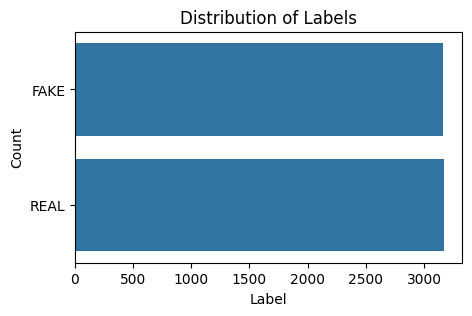

In [3]:

# Visualize the distribution of the target variable
plt.figure(figsize=(5, 3))
sns.countplot(data['label'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


create a word cloud based on the news titles to visualize the most frequent words

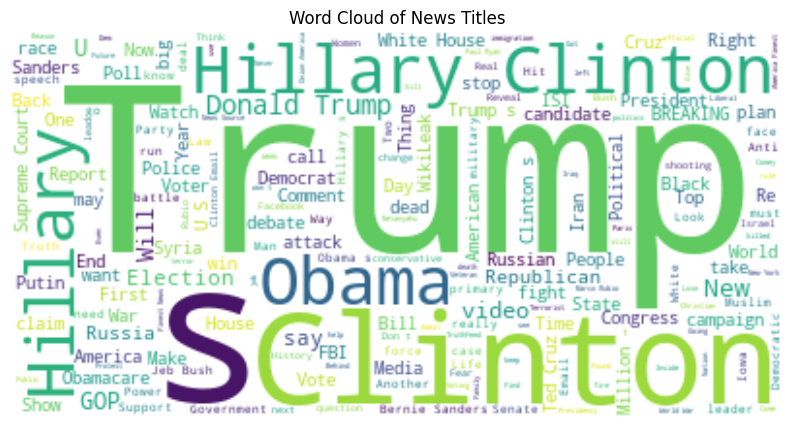

In [4]:
# Create a word cloud
text = ' '.join(data['title'])
wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Titles')
plt.show()

plot a histogram of the lengths of the news titles to understand their distribution

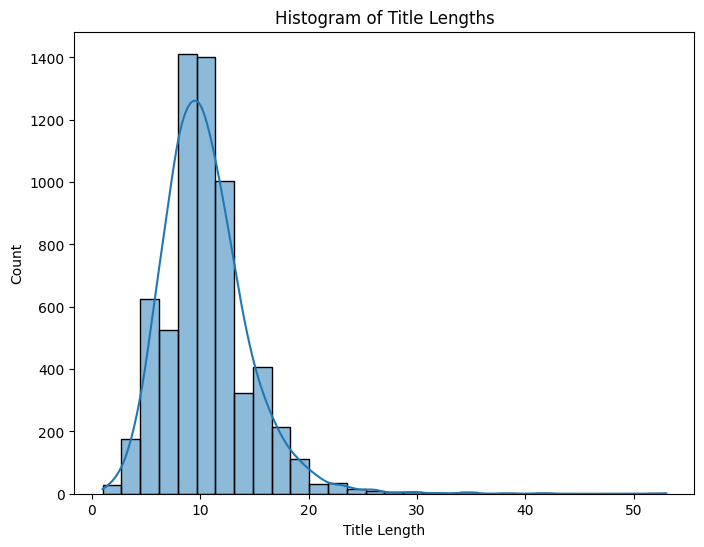

In [5]:
# Plot histogram of text lengths
data['title_length'] = data['title'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(data['title_length'], bins=30, kde=True)
plt.title('Histogram of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Count')
plt.show()

Text Data Vectorization, Dataset Splitting, and Model Training

In [6]:
# Vectorize the text data
cv = CountVectorizer()
x = cv.fit_transform(x)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

Evaluate the model

In [7]:

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8074191002367798
Classification Report:
               precision    recall  f1-score   support

        FAKE       0.84      0.76      0.80       628
        REAL       0.78      0.86      0.82       639

    accuracy                           0.81      1267
   macro avg       0.81      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267

Confusion Matrix:
 [[476 152]
 [ 92 547]]


Confusion Matrix

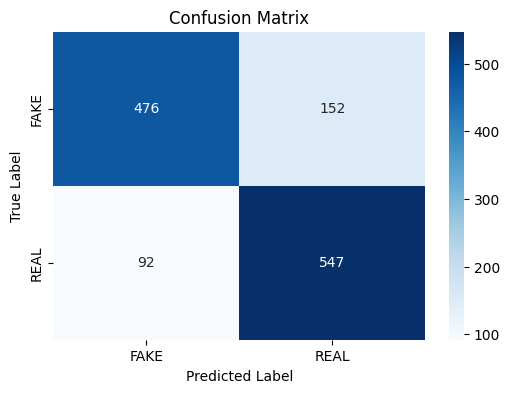

In [8]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Testing the Model by giving headlines

In [9]:
news_headline = "CA Exams 2021: Supreme Court asks ICAI to extend opt-out option for July exams, final order tomorrow"
data = cv.transform([news_headline]).toarray()
print(model.predict(data))


news_headline = "Cow dung can cure Corona Virus"
data = cv.transform([news_headline]).toarray()
print(model.predict(data))

['REAL']
['FAKE']
